![cadCAD Logo](https://avatars3.githubusercontent.com/u/67073537?s=200&v=4)

# 🌻 Gardens cadCAD Sketch 📝 

! Very WIP

## Overview

**Gardens:** *community currencies with a voice*.

- Economic alignment via token collateralization.
- Anyone can permissionlessly enter and exit the org.
- Signal preferences instead of making hard decisions

[Gardens](https://github.com/1Hive/gardens-template) aim to support bottom-up grass roots coordination in decentralized networks. Anyone can come and go as they please. Members of the network can signal their preferences continuously.

Gardens is a social, financial, and technical foundation for online communities to organize. This empowers people to coordinate around causes, social movements, or even memes. Gardens are designed to be operationally decentralized and autonomous from day one. Based on our interpretation of the "[Hinman Test](https://www.lawandblockchain.eu/hinman-test/)" Gardens allow people to take advantage of tokenization while minimizing the risk of being designated as a security. Anyone can summon a Garden. The Garden summoner, however, does not have any special rights or authority within that community.

Gardens are composable! You can have a main Garden as the core of an ecosystem, but then also spin up derivative Gardens that use the tokens of the main DAO as the collateral/currency for the derivative DAOs. This creates an ecosystem of Gardens orgs that are connected to the main org (giving participants a stake in the ecosystem), but also allow each Garden to focus on it's own goals and use cases.

You can learn more about Gardens [here](https://forum.1hive.org/t/gardens-overview/32).

## System Requirements

### What questions are we trying to answer?

- How will demand (growth) affect price?
- What should the token permissioned access threshold be to allow people to engage with the community if they're serious about growing their token project?
- At what levels of adoption/churn would the token price stay within a range that we're happy with?
- How do we do liquidity mining and contributor rewards if the only way to get tokens is to buy them? Should we have a community treasury?
    - if there's a premined community treasury, that effectively dilutes newer contributors. If the presale price is X, but the curve opens at X*100, then the collateral per token in the pool will be out of balance for the people who buy into the curve (or does the curve somehow adapt for this?)


What might be the drivers of demand for tokens?

Is there a difference between what might initially make some acquire tokens vs hodling them long term?

What kind of behavior might we expect with various levels of adoption/churn?

What makes these tokens valuable?

- Monetary value is backed by collateral
- Utility value is backed by access to the community
- Governance value is backed by signalling proposals anc contract enforced funding proposals

### What components does the system include?

- Marketplace presale
- Marketplace bonding curve
- Treasury (accumluation of assets from Marketplace fees as well as external inputs)
- Conviction voting (how meaningfully can token holders affect signalling)
- Conviction voting (how meaningfully can token holders allocate funding)

### What components are we excluding (at least for now)

- Tollgate (proposal submission fees to deter spam)
- Dandelion voting (mainly used to modify the DAO)
- Redemption (the "redemption of last resort" if the collateral in the Marketplace is low)

## Visual System Mapping

The overall relationships in the model are:
- demand => price
- price => adoption/churn (probably dependent on the preferences of agents)
- agent preferences => demand => buy/sell => price

### Causal loop diagram

TBD.

### Stock and flow diagram

TBD.

### cadCAD differential specification

TBD.



## Mathematical Specification

TBD.

## System Setup

### Check cadCAD

This cell doesn't do anything, but it does ensure that you know what version of cadCAD you're running. That way if/when you encounter technical difficulties you can tell the community which version of cadCAD you're running. Might save you hours of pain if all you need to do is upgrade to the latest version. 

In [30]:
%pip show cadCAD

Name: cadCAD
Version: 0.4.23
Summary: cadCAD: a differential games based simulation software package for research, validation, and         Computer Aided Design of economic systems
Home-page: https://github.com/cadCAD-org/cadCAD
Author: Joshua E. Jodesty
Author-email: joshua@block.science
License: LICENSE.txt
Location: /usr/local/lib/python3.8/site-packages
Requires: fn, pandas, funcy, pathos
Required-by: cadCAD-diagram
Note: you may need to restart the kernel to use updated packages.


### Import Libraries

These are the libraries you'll need (cadCAD stuff) and that could be useful (python stuff) for your cadCAD model.

We're using [cadCAD Diagram](https://github.com/cadCAD-org/cadCAD_diagram), which is separate from cadCAD. If you're using the VS Code container from this repo it's already installed, but otherwise you might need to instal it.

In [31]:
# Python
import numpy as np
import random as random

# cadCAD
from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import Experiment
from cadCAD import configs
from cadCAD.engine import ExecutionMode, ExecutionContext
from cadCAD.engine import Executor
from cadCAD_diagram import diagram_from_config

# Notebook setup
experiment = Experiment()
del configs[:]

### Initial System Parameters

These are the parameters that control the behavior of a system. For example, if you were modeling a Web3 protocol these would be the parameters within a system that token holders could vote to modify. All of the parameters of a protocol that can be modified should be accessible here. That way it's easy to modify and run similations to explore how parameter changes might affect the network.

In [32]:
# The initial state of the system
genesis_states = {
    'presale_length': 1, # in blocks
    'presale_price': 1, # in xDAI
    'tokens': 1, # number of tokens
    'things': 100
}

# The parameters to run the model
params = {
    # Params within the system
    'M': {
        'param_1': [2],
        'param_2': [7]
    },
    # Timesteps per run
    'T': range(100),
    # Number of parallel runs
    'N': 3
}

## Building the Model

### Policy Functions

Policy functions are like flows in stock and flow diagrams. They modify the inputs to state update functions.

In [33]:
# We start policy functions with p_ so that they're easier to keep track of
# when we put them into state update blocks. 
def p_data_point(params, step, sH, s):
    # Variables
    p1 = params['param_1']
    things = s['things']
    random_int = np.random.randint(1, things)

    # Logic
    # a data point that's useful for something
    data_point = random_int * p1

    # Output
    # returns a python dictionary item
    return ({'data_point': data_point})


### State Update Functions

These functions take in inputs (state variables and policies) and modify the state.

In [34]:
# We start state update functions with s_ so that they're easier to keep track of
# when we put them into state update blocks. 
def s_modify_state(params, step, sH, s, _input):
    # Variables
    y = 'stuff'
    x = s[y]
    
    # Logic
    add_stuff = round(s['things'] / _input['data_point']) + params['param_2']
    x += add_stuff
    
    # Output
    return (y, x)


### State Update Blocks

If you're approaching cadCAD from Web3 you can think of the state of the model as something that evolves in blocks. Each block has a set of actions that updates the state. Those transactions then get batched into blocks to be processed together. In cadCAD blocks are called "`partial_state_update_blocks`." As you can see below, this is an array that is very similar to a "block" in a blockchain in that it represents a set of actions to update the state. That state is then updated across many timesteps. This is similar to how the state of a blockchain is updated over many timesteps as new blocks are added.



In [35]:
partial_state_update_blocks = [
    {
        'label': 'Example State Update Block',
        # policies represent the behavior of agents that interact with components of the system
        'policies': { 
            'data_point': p_data_point
        },
        # state variables that will be updated
        'variables': {
            'stuff': s_modify_state
        }
    }
]

## Running the Model

In [36]:
experiment.append_configs(
    initial_state = genesis_states,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = config_sim(params)
)

exec_mode = ExecutionMode()
exec_context = ExecutionContext()

simulation = Executor(exec_context=exec_context, configs=configs) 
raw_system_events, tensor_field, sessions = simulation.execute() 


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 2, 3, 2)
Execution Method: local_simulations
SimIDs   : [0, 0, 0]
SubsetIDs: [0, 0, 0]
Ns       : [0, 1, 2]
ExpIDs   : [0, 0, 0]
Execution Mode: parallelized
Total execution time: 0.04s


## Data Visualization

This is often half the battle. Not only do need to design and build a cadCAD model, but you need to understand how it's working and be able to effectively communicate that to other people. A picture says a thousand words, thus enter data viz. Getting good at using python data viz libraries is probably the highest leverage thing you can do after you learn the cadCAD basics.

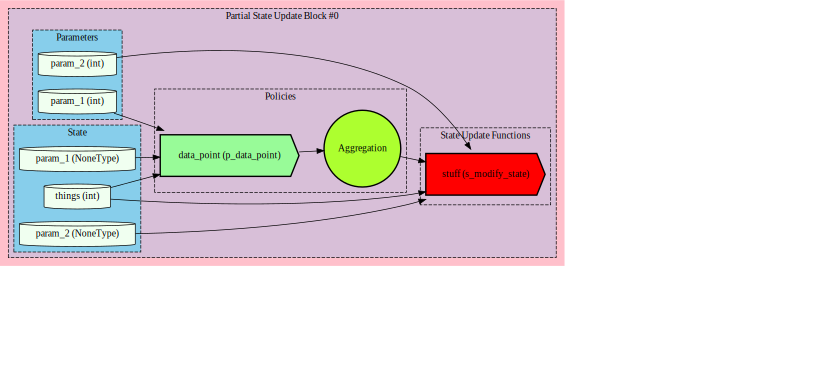

In [37]:
diagram_from_config(configs[0])

In [38]:
import pandas as pd
simulation_result = pd.DataFrame(raw_system_events)
simulation_result.set_index(['subset', 'run', 'timestep', 'substep'])

stuff  things  simulation
subset run timestep substep                           
0      1   0        0            1     100           0
           1        1            9     100           0
           2        1           17     100           0
           3        1           25     100           0
           4        1           44     100           0
...                            ...     ...         ...
       3   96       1          917     100           0
           97       1          926     100           0
           98       1          934     100           0
           99       1          942     100           0
           100      1          950     100           0

[303 rows x 3 columns]

<AxesSubplot:xlabel='timestep'>

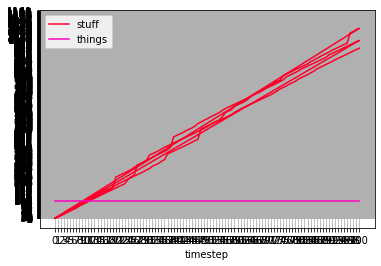

In [39]:
simulation_result.plot('timestep', ['stuff', 'things'], grid=True, 
        colormap = 'gist_rainbow',
        xticks=list(simulation_result['timestep'].drop_duplicates()), 
        yticks=list(range(1+(simulation_result['stuff']+simulation_result['things']).max())))